In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray

%matplotlib inline

In [3]:
file_name = 'MSLP-Jan2009.nc'

#Select times
start_time = '2009-01-01T00'
end_time = '2009-01-30T00'

#Select Region
start_lat = 90
end_lat = 0.5 # ERA-Interim stores data from 90 to -90, hence reversed

#Setup colorbar. Right now, the colorbar will "mask" values above 100000
# just to easily look at low pressure levels.
levels = np.linspace(97000, 100000, 16)

data = xarray.open_dataset(file_name).to_array()

data = data.loc[dict(latitude=slice(start_lat,end_lat))].squeeze()

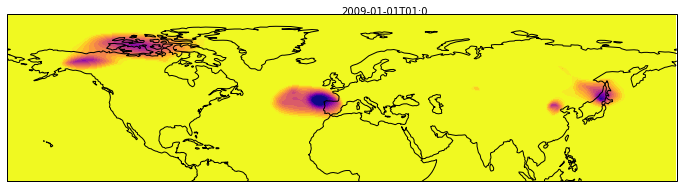

In [35]:
from IPython.display import HTML
from matplotlib import animation, rc
import cartopy.crs as ccrs
import types

rc('animation',html='html5')
rc('animation',writer='avconv')

#Number of time steps
steps = data.shape[0]


fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
text = ax.text(data.longitude.min().data, data.latitude.max().data,str(data.time[0].data)[0:15])
data_proj = ccrs.PlateCarree(central_longitude=180)

#contours = ax.imshow(data[0,:], extent=extent, cmap='plasma', aspect='auto')

#extent = [data.longitude.min().data,data.longitude.max().data,\
#          data.latitude.min().data,data.latitude.max().data]

def setvisible(self, vis):
    for c in self.collections: c.set_visible(vis)
        
def setanimated(self, vis):
    for c in self.collections: c.set_animated(vis)

def init_func():
    contours = ax.contourf(data.longitude, data.latitude, data[0,:], levels=levels, cmap='plasma', extend='both', transform=data_proj)
    ax.coastlines()
    #ax.text(data.time)
    contours.set_visible = types.MethodType(setvisible, contours)
    contours.set_animated = types.MethodType(setanimated, contours)
    contours.axes = plt.gca()
    contours.figure = fig
    #ext = ax.text(data.longitude.min().data, data.latitude.max().data,str(data.time[0].data)[0:15])
    text.set_text(str(data.time[0].data)[0:15])
    #contours = [contours, text]
    return (contours,text)

def anim_func(time_step):
    #contours = ax.imshow(data[time_step,:], extent=extent, cmap='plasma', aspect='auto')
    contours = ax.contourf(data.longitude, data.latitude, data[time_step,:], levels=levels,cmap='plasma', extend='both', transform=data_proj)
    ax.coastlines()
    contours.set_visible = types.MethodType(setvisible, contours)
    contours.set_animated = types.MethodType(setanimated, contours)
    contours.axes = plt.gca()
    contours.figure = fig
    text.set_text(str(data.time[time_step].data)[0:15])
    #ext = ax.text(data.longitude.min().data, data.latitude.max().data,str(data.time[time_step].data)[0:15])
    #contours = [contours, text]
    return (contours,text)

anim = animation.FuncAnimation(fig, anim_func, init_func=init_func, frames=steps, interval=200, blit=False, )


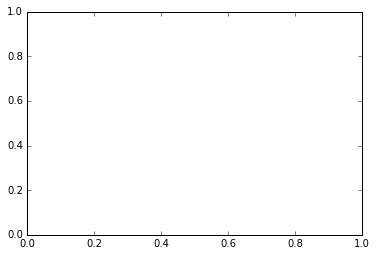

In [36]:
anim